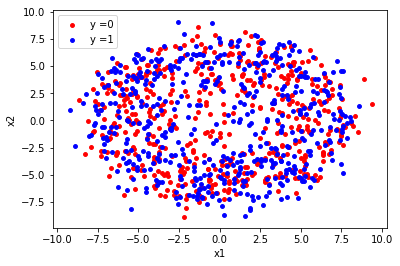

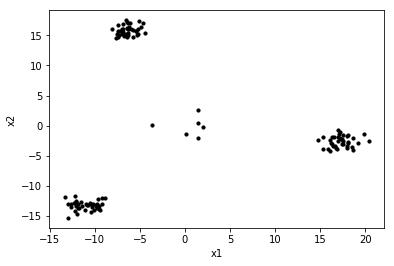

[-214209.24998597434, -207320.2984954398, -199773.18038920927, -200622.4785651689, -202074.60215217288, -202364.79921202274, -204660.06128616605, -206024.30363258132, -207235.14025789415]


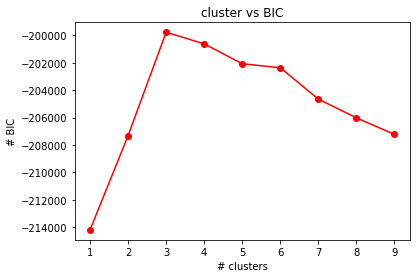

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  2  1  1  1  2  2  2
  1  1  2  1  1  1  1  2  2  1  2  2  2  2  1  2  1  2  2  1  1  2  1  2
  1  1  1  1  3  4  4  4  4  4  4  3  4  4  4  3  3  3  4  4  4  4  4  4
  3  4  3  4  4  3  3  3  4  4  3  3  4  4  4  4  3  3  5  6  7  8  9 10]
{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19

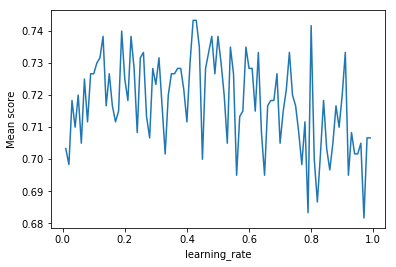

GradientBoostingClassifier: 
validation data score = 0.710000 

Feature ranking:
1. feature 34 (0.070664)
2. feature 54 (0.062192)
3. feature 74 (0.061576)
4. feature 46 (0.025629)
5. feature 14 (0.024923)
6. feature 53 (0.022185)
7. feature 24 (0.018755)
8. feature 89 (0.016865)
9. feature 63 (0.015983)
10. feature 6 (0.015975)
11. feature 71 (0.015724)
12. feature 111 (0.014537)
13. feature 109 (0.014426)
14. feature 97 (0.014260)
15. feature 107 (0.013665)
16. feature 110 (0.013526)
17. feature 116 (0.013524)
18. feature 81 (0.013419)
19. feature 105 (0.012495)
20. feature 92 (0.012371)
21. feature 85 (0.011864)
22. feature 94 (0.011828)
23. feature 115 (0.011436)
24. feature 2 (0.011155)
25. feature 15 (0.010923)
26. feature 55 (0.010914)
27. feature 48 (0.010752)
28. feature 5 (0.010375)
29. feature 100 (0.010130)
30. feature 1 (0.010035)
31. feature 99 (0.009808)
32. feature 93 (0.009785)
33. feature 9 (0.009601)
34. feature 22 (0.009348)
35. feature 60 (0.008836)
36. feature 68 

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

def pcaprojection(X):
    ''' 
    :param X: Original data 
    :1.Standardize the Data 2.Fit the model with X and apply the dimensionality reduction on X.
    :return: dimension reduced X  
    '''
    #Standardize the Data
    X_stand = StandardScaler().fit_transform(X)

    #PCA Projection to 2D
    pca = PCA(n_components=2)
    X_new = pca.fit_transform(X_stand)
    
    return X_new

def classifytarget(X,Y):
    '''
    :param X: dimension reduced X  
    :param Y: target Y array
    :Classify new X into differnt class according to target Y
    :return: n arrays with differnt target  
    '''
    X_0 = []
    X_1 = []
    for i, y in enumerate(Y):
        if (y == 0):
            X_0.append(X[i,:]) #put all samples with target 0
        else:
            X_1.append(X[i,:]) ##put all samples with target 1
    
    return X_0,X_1

def visualization1(X_0,X_1):
    '''
    :param X_0: all samples with target 0 
    :param X_1: all samples with target 1
    :plot newdata with known targets
    :return: plot of component 1 vs component 2
    '''
    X_0 = np.array(X_0)
    X_1 = np.array(X_1) #convert list to array
    #plot points
    plt.scatter(X_0[:,0], X_0[:,1],15,
            color='red', marker='o', label='y =0')
    plt.scatter(X_1[:,0], X_1[:,1],15,
    color='blue', marker='o', label='y =1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.show()
    
def visualization2(X):
    '''
    :param X: all samples with unknown targets 
    :plot newdata with unknown targets
    :return: plot of component 1 vs component 2
    '''
    #plot points
    plt.scatter(X[:,0], X[:,1],10,
            color='black', marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()
    
def compute_bic(kmeans,X):
    '''
    :param kmeans: List of clustering object from scikit learn
    :param X:  multidimension np array of data points
    :Computes the BIC metric for a given clusters
    :returns:BIC value
    '''
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

def logisticregre(X_train,Y_train,X_vali,Y_vali,cv):
    '''
    :param X_train: train X
    :param Y_train: train Y
    :param X_vali: validaiton X
    :param Y_vali: validaiton Y
    :param cv: cross-validation generator
    :Use LogisticRegressionCV classifiers, and tune each classifier with cross-validation using the training data.
    :return: score of validation data
    '''
    logisticregre = LogisticRegressionCV(cv = cv)
    logisticregre.fit(X_train, Y_train)
    score = logisticregre.score(X_vali,Y_vali)
    return score

def gridcv(X_train,Y_train,X_vali,Y_vali,cv,classifier,param_grid):
    '''
    :param X_train: train X
    :param Y_train: train Y
    :param X_train: validation X
    :param Y_train: validation Y
    :param cv: cross-validation generator
    :param classifier: differnt classifiers
    :param param_grid: parameter in grid
    :Use gridsearchCV and tune each classifier with cross-validation using the training data.
    :return: best_estimator
    '''

    grid = GridSearchCV(classifier,param_grid=param_grid,cv=cv)
    #reshape Y
    c, r = Y_train.shape
    Y_train_new = Y_train.reshape(c,)

    grid.fit(X_train, Y_train_new)
    best_estimator = grid.best_estimator_
    print("The best classifier is: ", best_estimator)
    
    best_estimator.fit(X_train,Y_train)  #fit training data
    score = best_estimator.score(X_vali,Y_vali) #calculate score with validation  data

    return grid, best_estimator,score

def importances(best_estimator,n_features):
    '''
    :param best_estimator: best_estimator of classifier
    :param n_features : number of proteins
    :return: variable importance
    '''
    #importance and feature
    importances = best_estimator.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(n_features):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        
def plotclassifier(grid,para_range,label):
    '''
    :param grid: grid
    :param C_range : range of C parameter
    :param para_range : range of tuning parameter
    :param label : string, name of parameter
    :return: plot of score vs parameter
    '''
    scores = [x[1] for x in grid.grid_scores_]

    #plot
    plt.plot(para_range, scores)

    plt.legend()
    plt.xlabel(label)
    plt.ylabel('Mean score')
    plt.show()


#read files
f = pd.read_csv('/Users/ccai28/Desktop/CS/ML/Project4/project_data.txt',sep='\t', header = None, skiprows = 1)

#read data
X = f.loc[:,1:120].values
Y = f.loc[:,[121]].values

#split arrays or matrices into random train ,vaidation and test subsets
X_train, X_nontrain, Y_train, Y_nontrain  = train_test_split(X,Y,test_size = 0.4,random_state=42)
X_vali, X_test, Y_vali, Y_test = train_test_split(X_nontrain,Y_nontrain,test_size = 0.5)
X_trans = np.transpose(X)

'''
--------------------- Question 1 ---------------------
'''
#for the subjects
X_new_s = pcaprojection(X)
X_0_s,X_1_s = classifytarget(X_new_s,Y)
visualization1(X_0_s,X_1_s)

#for the proteins
X_new_p = pcaprojection(X_trans)
visualization2(X_new_p)

'''
--------------------- Question 2 ---------------------
'''

ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
kMeans = [KMeans(n_clusters = i, init="k-means++").fit(X_trans) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X_trans) for kmeansi in kMeans]
print BIC

plt.plot(ks,BIC,'r-o')
plt.title("cluster vs BIC")
plt.xlabel("# clusters")
plt.ylabel("# BIC")
plt.show()

#k-means clustring
kmeans = KMeans(n_clusters=3).fit(X_trans)#n_clusters=3
# Fitting the input data and getting the cluster labels
labels_k = kmeans.labels_
print labels_k

#AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3).fit(X_trans)
# Fitting the input data and getting the cluster labels
labels_agg = agglomerative.labels_
print labels_agg

#AffinityPropagation
affinity = AffinityPropagation().fit(X_trans)
# Fitting the input data and getting the cluster labels
labels_aff = affinity.labels_
print labels_aff

'''
--------------------- Question 3 ---------------------
'''

#set parameter for Gridsearch
cv = 10
n_features = X_train.shape[1]

#KNeighborsClassifier
n_neighbors_range = np.arange(1,20,1)
#print n_neighbors_range
#param_grid_n = dict(n_neighbors=n_neighbors_range) #set tuning parameter range

#grid_neigh,best_estimator_neigh,score_neigh = gridcv(X_train,Y_train,X_vali,Y_vali,cv,KNeighborsClassifier(),param_grid_n) #get best estimator
#plotclassifier(grid_neigh,n_neighbors_range,'n_neighbors') #plot score vs tuning parameter
#print('KNeighborsClassifier: \nvalidation data score = {:f} \n'.format(score_neigh))

#RandomForestClassifier
#n_estimators_range = np.arange(10,1000,100)
#print n_estimators_range
#param_grid_f = dict(n_estimators=n_estimators_range) 

#grid_forest,best_estimator_forest,score_forest = gridcv(X_train,Y_train,X_vali,Y_vali,cv,RandomForestClassifier(oob_score = True),param_grid_f)
#plotclassifier(grid_forest,n_estimators_range,'n_estimators')
#print('RandomForestClassifier: \nvalidation data score = {:f} \n'.format(score_forest))
#importances(best_estimator_forest,n_features)

#GradientBoostingClassifier
learning_rate_range = np.arange(1e-2,1,1e-2)
param_grid_b = dict(learning_rate=learning_rate_range)
print param_grid_b

grid_boost, best_estimator_boost,score_boost = gridcv(X_train,Y_train,X_vali,Y_vali,cv,GradientBoostingClassifier(),param_grid_b)
plotclassifier(grid_boost,learning_rate_range,'learning_rate')
print('GradientBoostingClassifier: \nvalidation data score = {:f} \n'.format(score_boost))
importances(best_estimator_boost,n_features)

#LogisticRegressionCV
#score_log = logisticregre(X_train,Y_train,X_vali,Y_vali,10)
#print('LogisticRegressionCV: \nvalidation data score = {:f} \n'.format(score_log))

#Returns the mean accuracy on the given test data and labels.
score_test = best_estimator_boost.score(X_test,Y_test)
print score_test